# Data Science

### Muhammad Bilal

# Task 1:
## Titanic Classification
### Make a system which tells whether the person will be save from sinking. What factors were most likely lead to success-socio-economic status, age, gender and more.

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


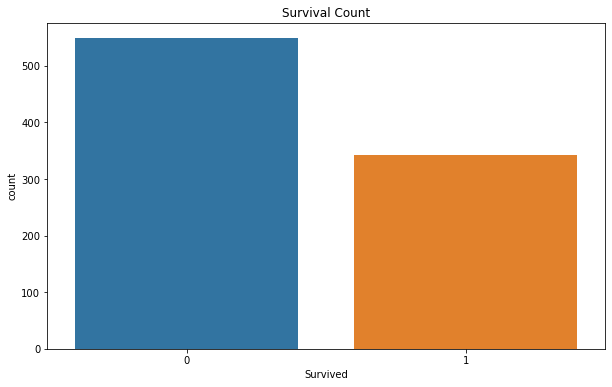

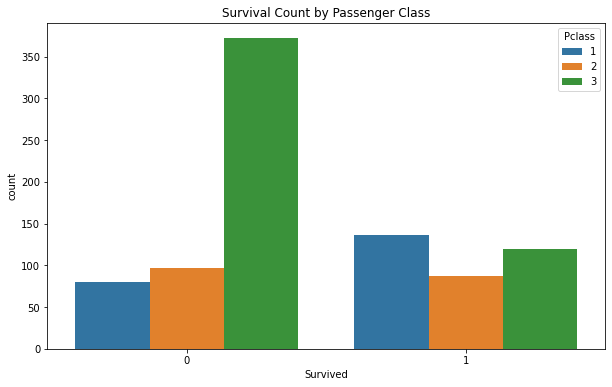

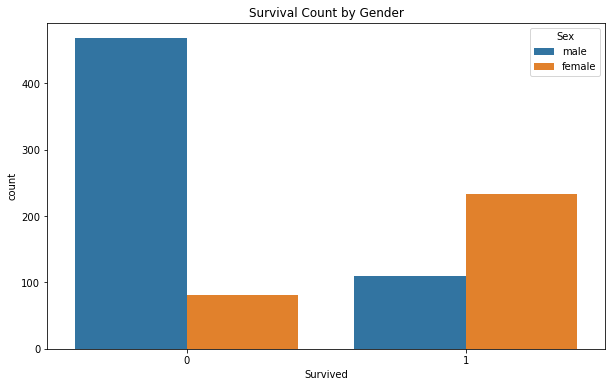

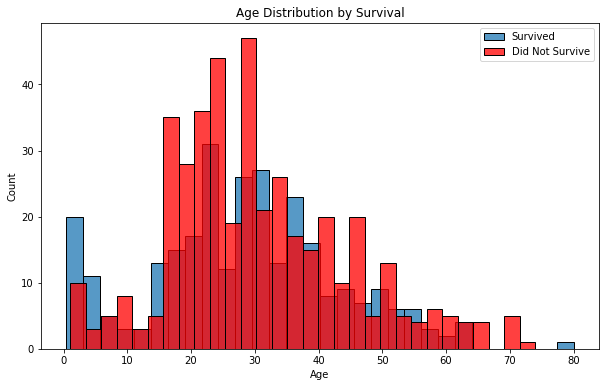

Training Accuracy: 0.800561797752809
Testing Accuracy: 0.8100558659217877
Confusion Matrix:
 [[90 15]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179

Feature Importance:
       Feature  Coefficient
4        Fare     0.126579
6  Embarked_Q    -0.046344
3       Parch    -0.096673
7  Embarked_S    -0.189756
2       SibSp    -0.349278
1         Age    -0.396010
0      Pclass    -0.785320
5    Sex_male    -1.277180


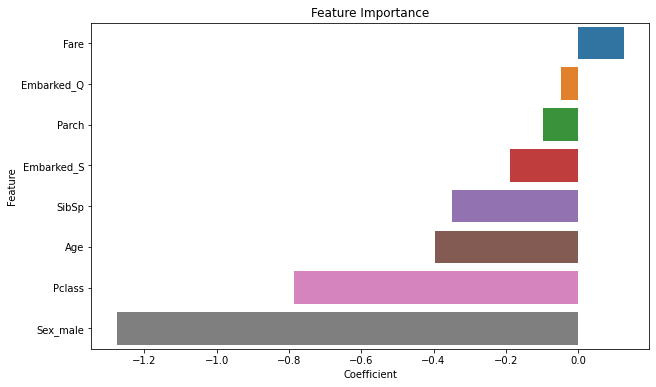

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Load the Titanic dataset
url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
titanic_df = pd.read_csv(url)

# Display the first few rows of the dataset
print(titanic_df.head())

# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', data=titanic_df)
plt.title('Survival Count')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Pclass', data=titanic_df)
plt.title('Survival Count by Passenger Class')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='Survived', hue='Sex', data=titanic_df)
plt.title('Survival Count by Gender')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(titanic_df[titanic_df['Survived'] == 1]['Age'], kde=False, bins=30, label='Survived')
sns.histplot(titanic_df[titanic_df['Survived'] == 0]['Age'], kde=False, bins=30, color='red', label='Did Not Survive')
plt.legend()
plt.title('Age Distribution by Survival')
plt.show()

# Data Preprocessing
# Drop columns that won't be used and handle missing values
titanic_df = titanic_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin'])
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Convert categorical features to numeric
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True)

# Define the features and the target variable
X = titanic_df.drop(columns='Survived')
y = titanic_df['Survived']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training
model = LogisticRegression()
model.fit(X_train, y_train)

# Model Evaluation
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))

print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Classification Report:\n", classification_report(y_test, y_test_pred))

# Feature Importance Analysis
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_[0]})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print("Feature Importance:\n", feature_importance)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
plt.title('Feature Importance')
plt.show()


# Task 2:
    
## Predictive Modeling with Linear Regression 
### Build a predictive model using linear regression to predict a numerical outcome based on one or more features. Use a dataset with a continuous target variable.

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
Training RMSE: 0.7196757085831575
Testing RMSE: 0.7455813830127761
Training R2 Score: 0.6125511913966952
Testing R2 Score: 0.5757877060324511


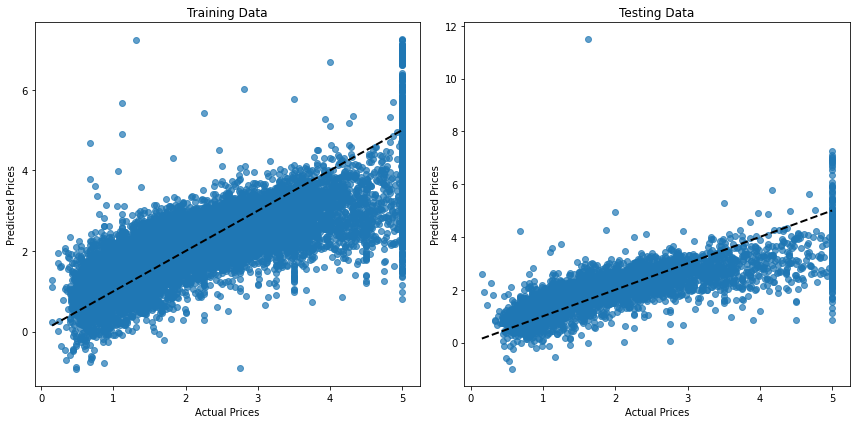

            Coefficient
MedInc         0.448675
HouseAge       0.009724
AveRooms      -0.123323
AveBedrms      0.783145
Population    -0.000002
AveOccup      -0.003526
Latitude      -0.419792
Longitude     -0.433708


In [2]:
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
california = fetch_california_housing(as_frame=True)
california_df = california.frame

# Display the first few rows of the dataset
print(california_df.head())

# Define the features and the target variable
X = california_df.drop(columns='MedHouseVal')
y = california_df['MedHouseVal']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Linear Regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Training RMSE: {train_rmse}')
print(f'Testing RMSE: {test_rmse}')
print(f'Training R2 Score: {train_r2}')
print(f'Testing R2 Score: {test_r2}')

# Plotting the results
plt.figure(figsize=(12, 6))

# Training data
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Training Data')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)

# Testing data
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Testing Data')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.tight_layout()
plt.show()

# Display the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


# Task 3

## A/B Testing Analysis
### Conduct an A/B testing analysis to evaluate the impact of a change or intervention. Analyze the results using statistical techniques and draw actionable insights.

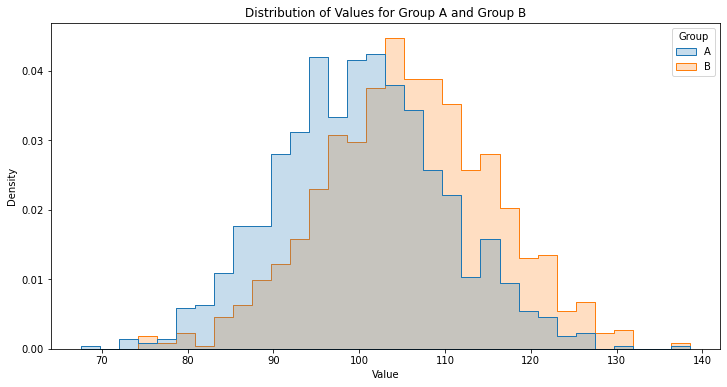

        count        mean       std        min        25%         50%  \
Group                                                                   
A      1000.0  100.193321  9.792159  67.587327  93.524097  100.253006   
B      1000.0  105.708362  9.974544  75.596114  98.937583  105.630771   

              75%         max  
Group                          
A      106.479439  138.527315  
B      112.288822  136.931076  
T-statistic: -12.477026028717471
P-value: 1.8492169348407711e-34
Reject the null hypothesis: There is a significant difference between the two groups.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Simulate some data for the A/B test
np.random.seed(42)

# Group A: Control group
group_a = np.random.normal(loc=100, scale=10, size=1000)  # mean=100, std=10, size=1000

# Group B: Treatment group
group_b = np.random.normal(loc=105, scale=10, size=1000)  # mean=105, std=10, size=1000

# Create a DataFrame
data = pd.DataFrame({
    'Group': ['A']*len(group_a) + ['B']*len(group_b),
    'Value': np.concatenate([group_a, group_b])
})

# Visualize the data
plt.figure(figsize=(12, 6))
sns.histplot(data, x='Value', hue='Group', element='step', stat='density', common_norm=False)
plt.title('Distribution of Values for Group A and Group B')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

# Summary statistics
summary_stats = data.groupby('Group')['Value'].describe()
print(summary_stats)

# Conduct a two-sample t-test
t_stat, p_value = stats.ttest_ind(group_a, group_b)
print(f'T-statistic: {t_stat}')
print(f'P-value: {p_value}')

# Actionable insights
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the two groups.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the two groups.")
